In [3]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import h5py
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


In [8]:
df = pd.read_csv("train/phase_3_TRAIN_7d499bff69ca69b6_6372c3e_MLPC2021_generic.csv")
df.head()

,id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,...,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength,mean_A,mean_V,quadrant
0,GG-01-000,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,...,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727,50.689655,2.724138,1
1,GG-01-001,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,...,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387,50.689655,2.724138,1
2,GG-01-002,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,...,-0.337422,0.103853,-0.388214,0.430684,-0.226197,0.0,0.758119,50.689655,2.724138,1
3,GG-01-003,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,...,-0.314282,0.118872,-0.335902,0.314371,-0.006619,1.0,0.747180,50.689655,2.724138,1
4,GG-01-004,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,...,-0.302913,-0.002940,-0.395495,0.368037,-0.162711,0.0,0.710480,50.689655,2.724138,1


In [9]:
# drop target value, student annotations and string ID from input features:
X = df.drop(columns=['quadrant','mean_A','mean_V','id','score_mode','score_key_strength', 'quadrant'])

# we want to predict the quadrant:
y = df['quadrant'].values

In [10]:
def plot_projection(proj,y):
    plt.figure(figsize=(40,20))
    colors = ['r','y','tab:blue','tab:green']
    for j in range(len(proj)):
                plt.scatter(proj[j][0], proj[j][1],color=colors[y[j]-1])
            

    plt.show()

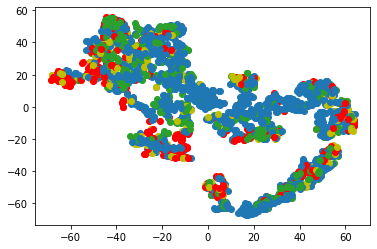

In [63]:
tsne=TSNE()
proj=tsne.fit_transform(X,y)
plot_projection(proj,y)

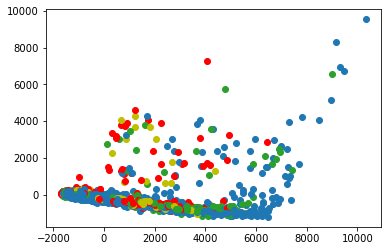

In [64]:
pca=PCA(n_components=2)
proj=pca.fit_transform(X,y)
plot_projection(proj,y)

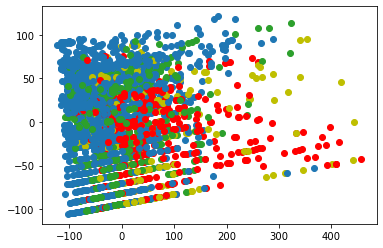

In [82]:
X_new = SelectKBest(f_classif, k=20).fit_transform(X, y)
pca=PCA(n_components=2)
proj=pca.fit_transform(X_new,y)
plot_projection(proj,y)

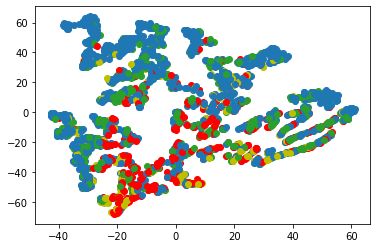

In [66]:
X_new = SelectKBest(f_classif, k=20).fit_transform(X, y)
tsne=TSNE()
proj=tsne.fit_transform(X_new,y)
plot_projection(proj,y)

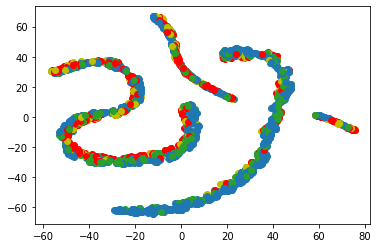

In [84]:
X_new = SelectKBest(mutual_info_classif, k=5).fit_transform(X, y)
tsne=TSNE()
proj=tsne.fit_transform(X_new,y)
plot_projection(proj,y)

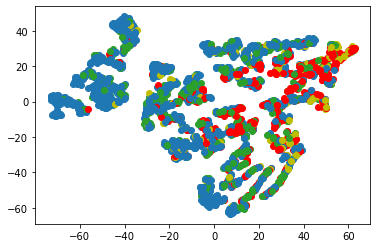

In [69]:
X_new = SelectKBest(f_classif, k=15).fit_transform(X, y)
tsne=TSNE()
proj=tsne.fit_transform(X_new,y)
plot_projection(proj,y)

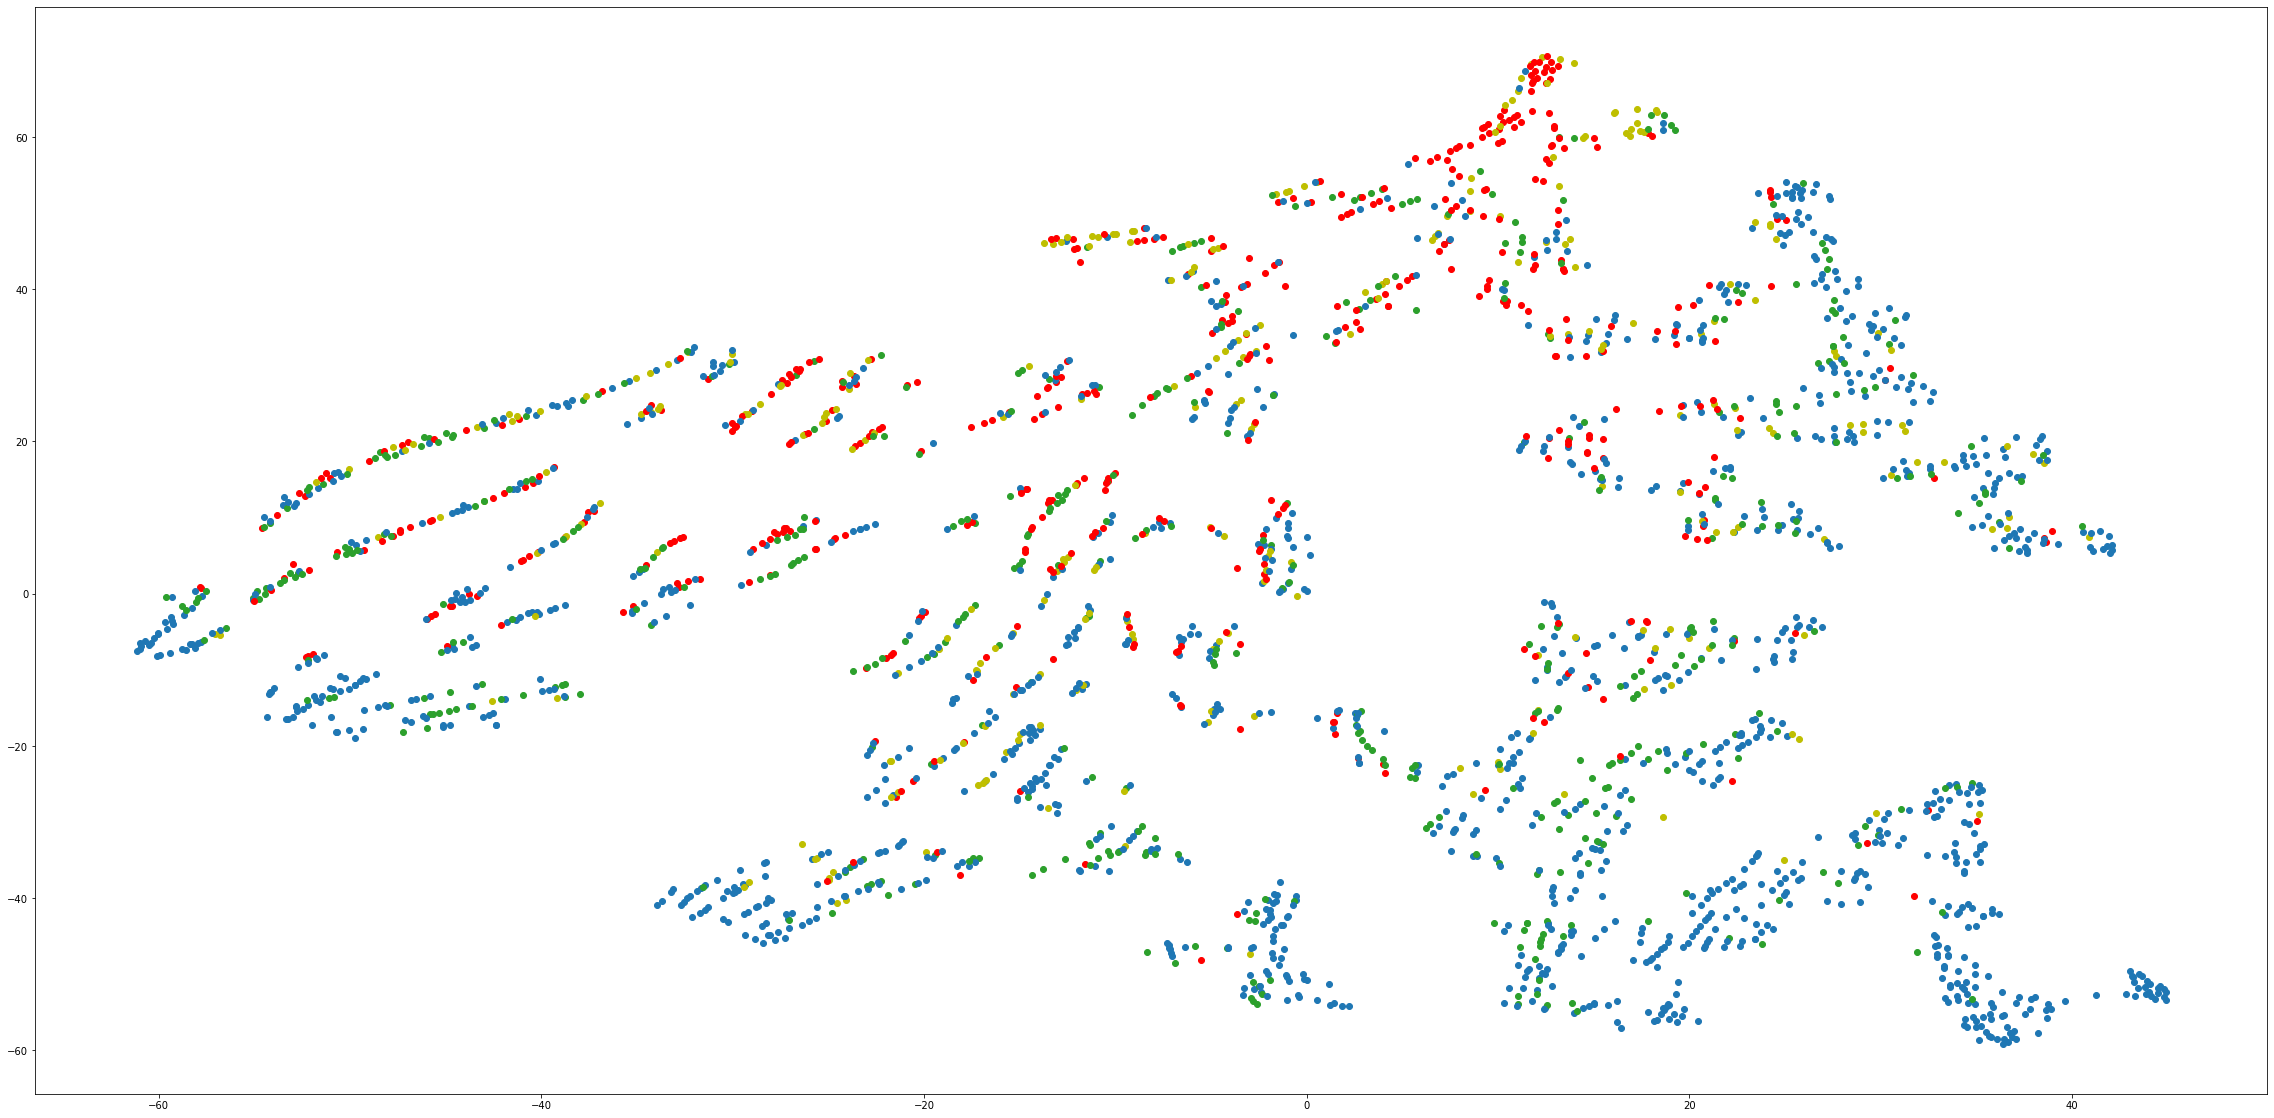

In [24]:
X_new = SelectKBest(f_classif, k=30).fit_transform(X, y)
tsne=TSNE()
proj=tsne.fit_transform(X_new,y)
plot_projection(proj,y)

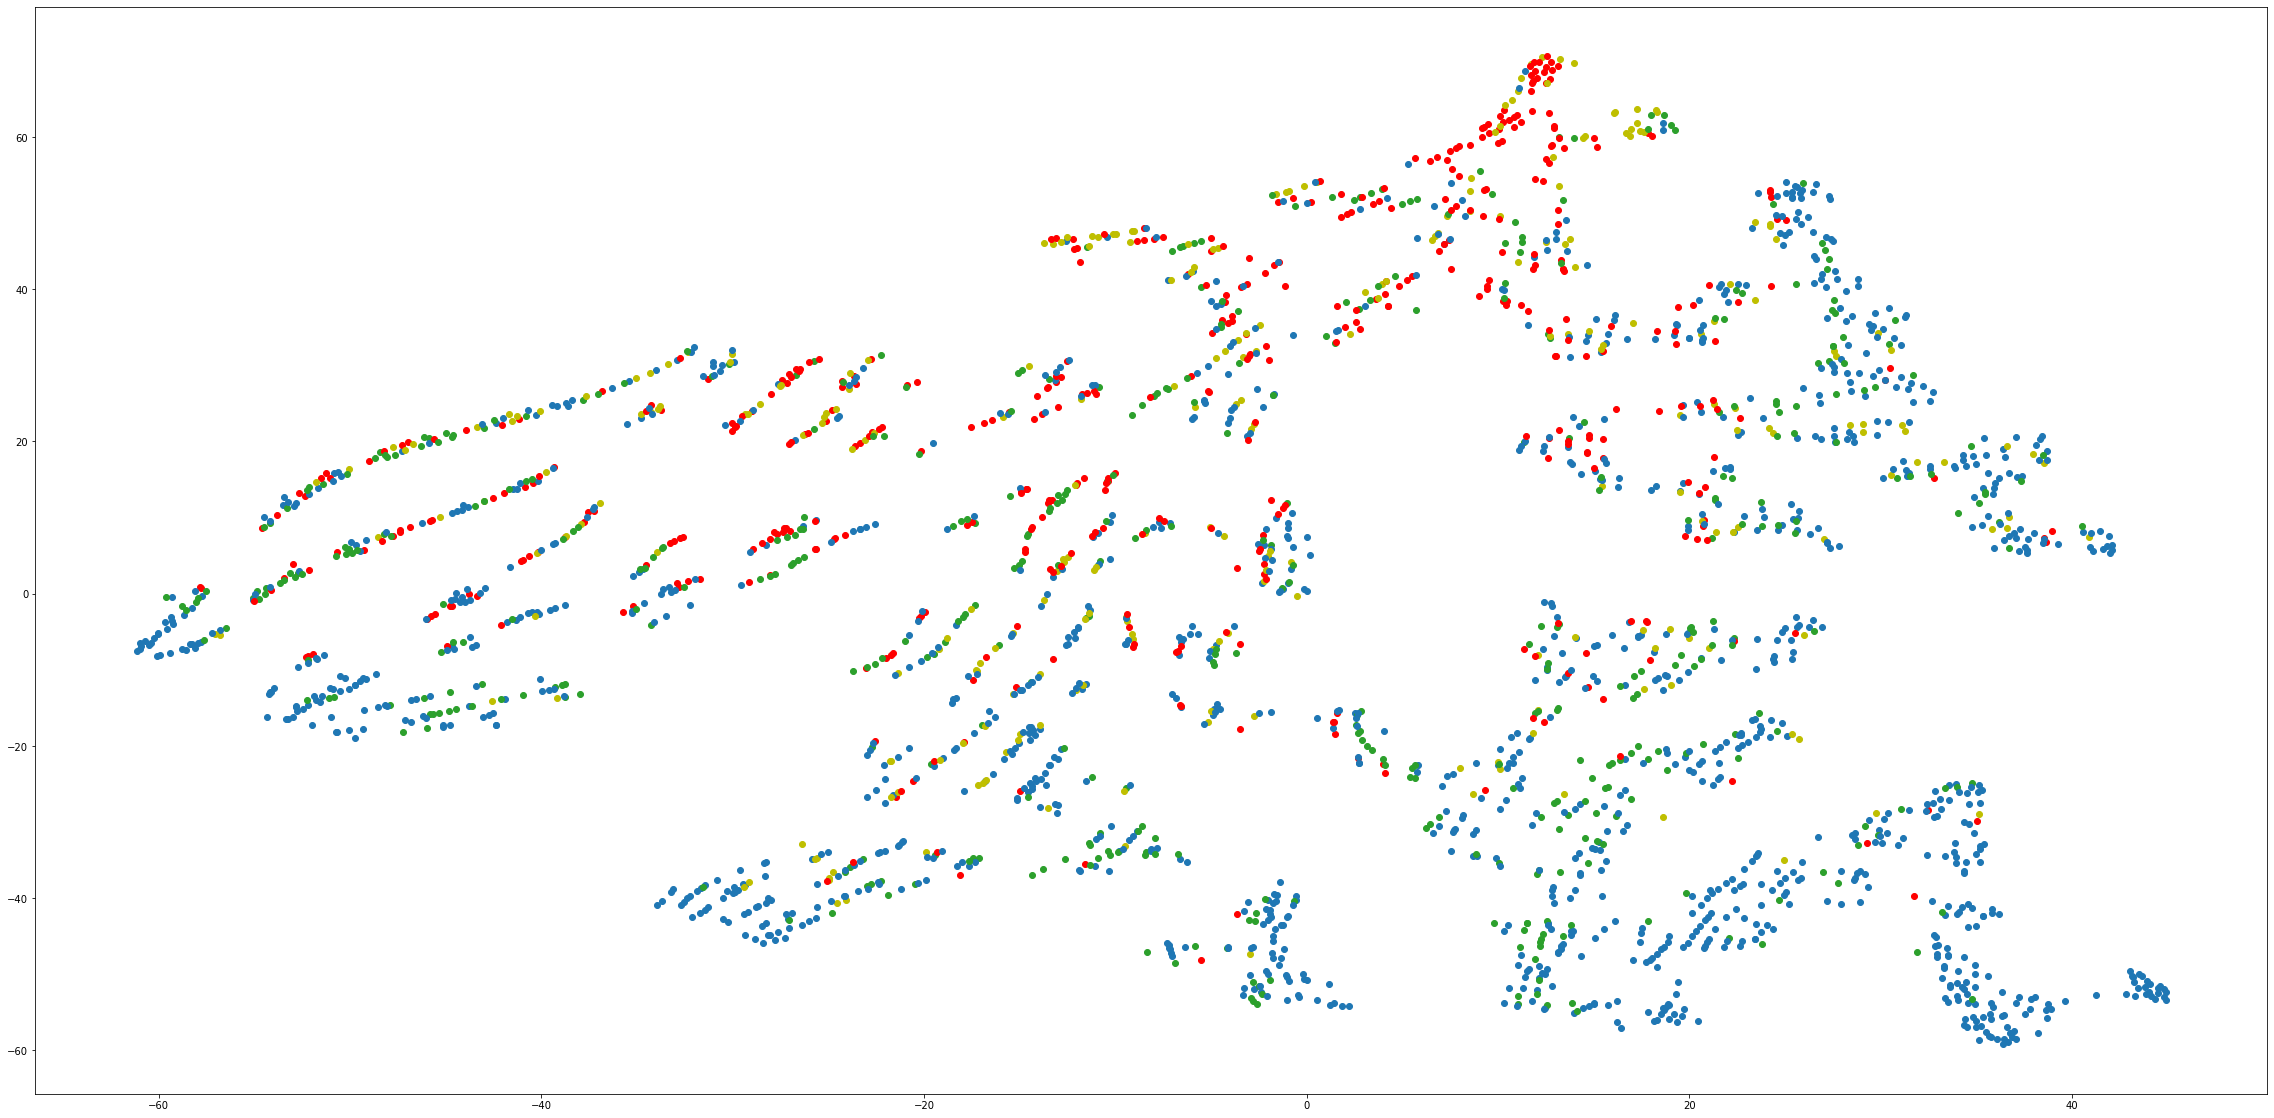

In [25]:
plt.figure(figsize=(40,20))
colors = ['r','y','tab:blue','tab:green']
for j in range(len(proj)):
            plt.scatter(proj[j][0], proj[j][1],color=colors[y[j]-1])


plt.show()

In [11]:
filename = "train/phase_4_TRAIN_22d5ff80542b443e_e2a955e_MLPC2021_melspect.h5"

h5_train = h5py.File(filename,'r')

In [12]:
X_train=[h5_train[index] for index in list(h5_train)]
X_train=np.array(X_train)

X_mel=np.zeros((len(X_train),16848))
for i,data in enumerate(X_train):
    #print(data.shape)
    #print(X_train[i].flatten().shape)
    X_mel[i]=X_train[i].flatten()

In [13]:
X_mel

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.13678529e-04, 7.20029057e-05, 2.55196076e-03],
       [4.54826403e+00, 1.79633784e+00, 1.85885310e+00, ...,
        4.58319482e-05, 1.80197239e-05, 2.36176839e-03],
       [2.46764278e+00, 9.77732658e-01, 1.07845438e+00, ...,
        6.25803368e-05, 9.23799089e-05, 2.32163278e-04],
       ...,
       [7.38776827e+00, 9.39998150e+00, 8.79809284e+00, ...,
        2.34913058e-03, 3.04006948e-03, 1.39352139e-02],
       [7.30392075e+00, 5.91564226e+00, 6.75389957e+00, ...,
        5.05207619e-03, 2.52741785e-03, 2.76915706e-03],
       [7.45420742e+00, 7.97288322e+00, 8.02188778e+00, ...,
        8.24735791e-04, 1.11219182e-03, 7.65333592e-04]])

In [17]:
tsne=TSNE()
proj=tsne.fit_transform(X_mel,y)

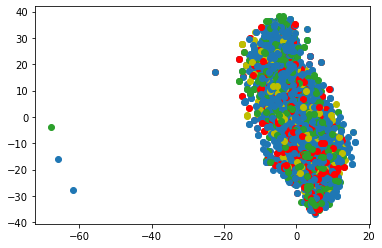

In [18]:
colors = ['r','y','tab:blue','tab:green']
for j in range(len(proj)):
            plt.scatter(proj[j][0], proj[j][1],color=colors[y[j]-1])
            

plt.show()

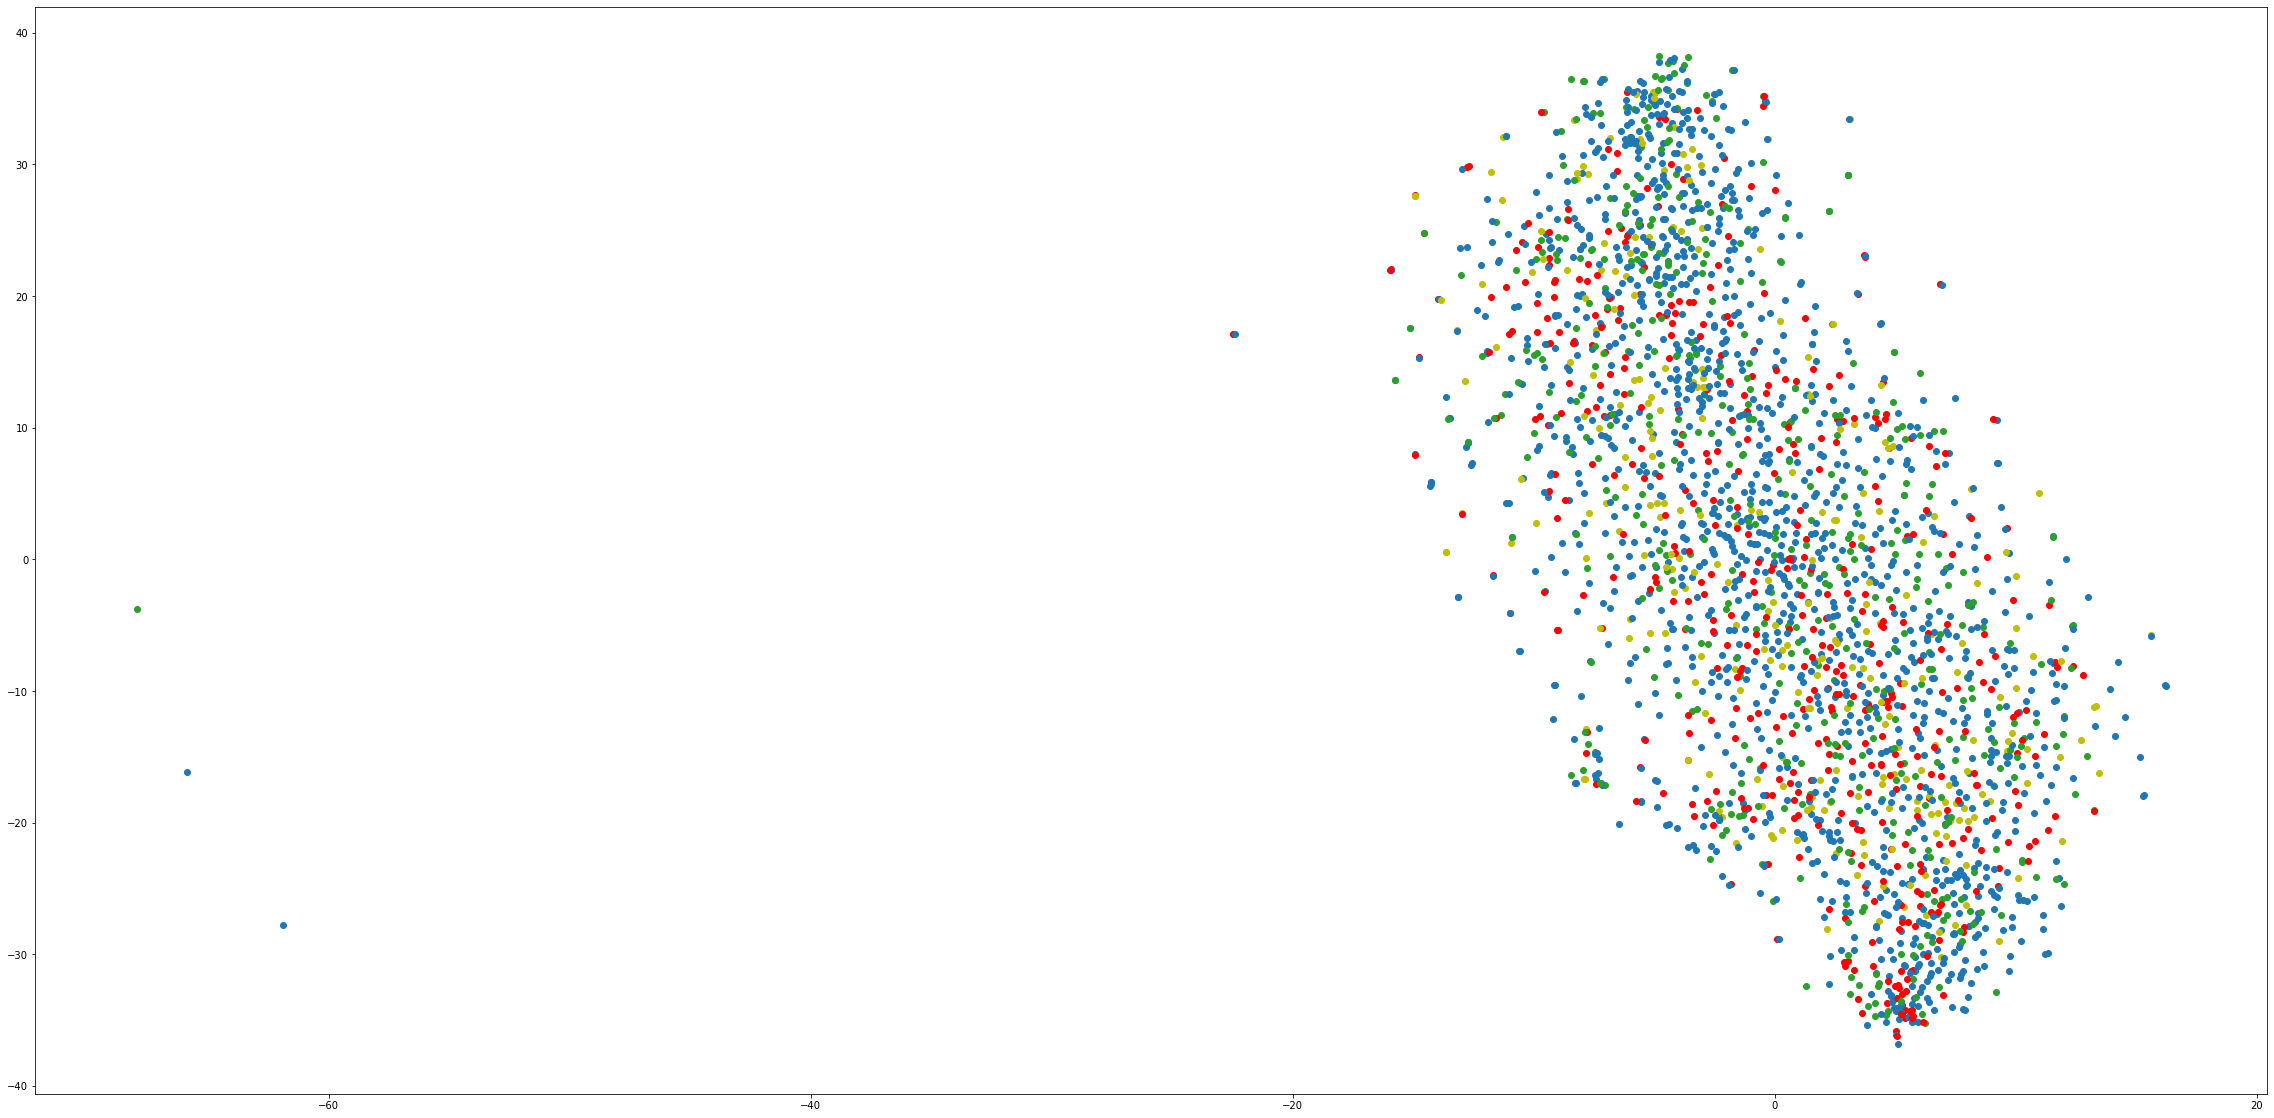

In [19]:
plt.figure(figsize=(40,20))
colors = ['r','y','tab:blue','tab:green']
for j in range(len(proj)):
            plt.scatter(proj[j][0], proj[j][1],color=colors[y[j]-1])


plt.show()

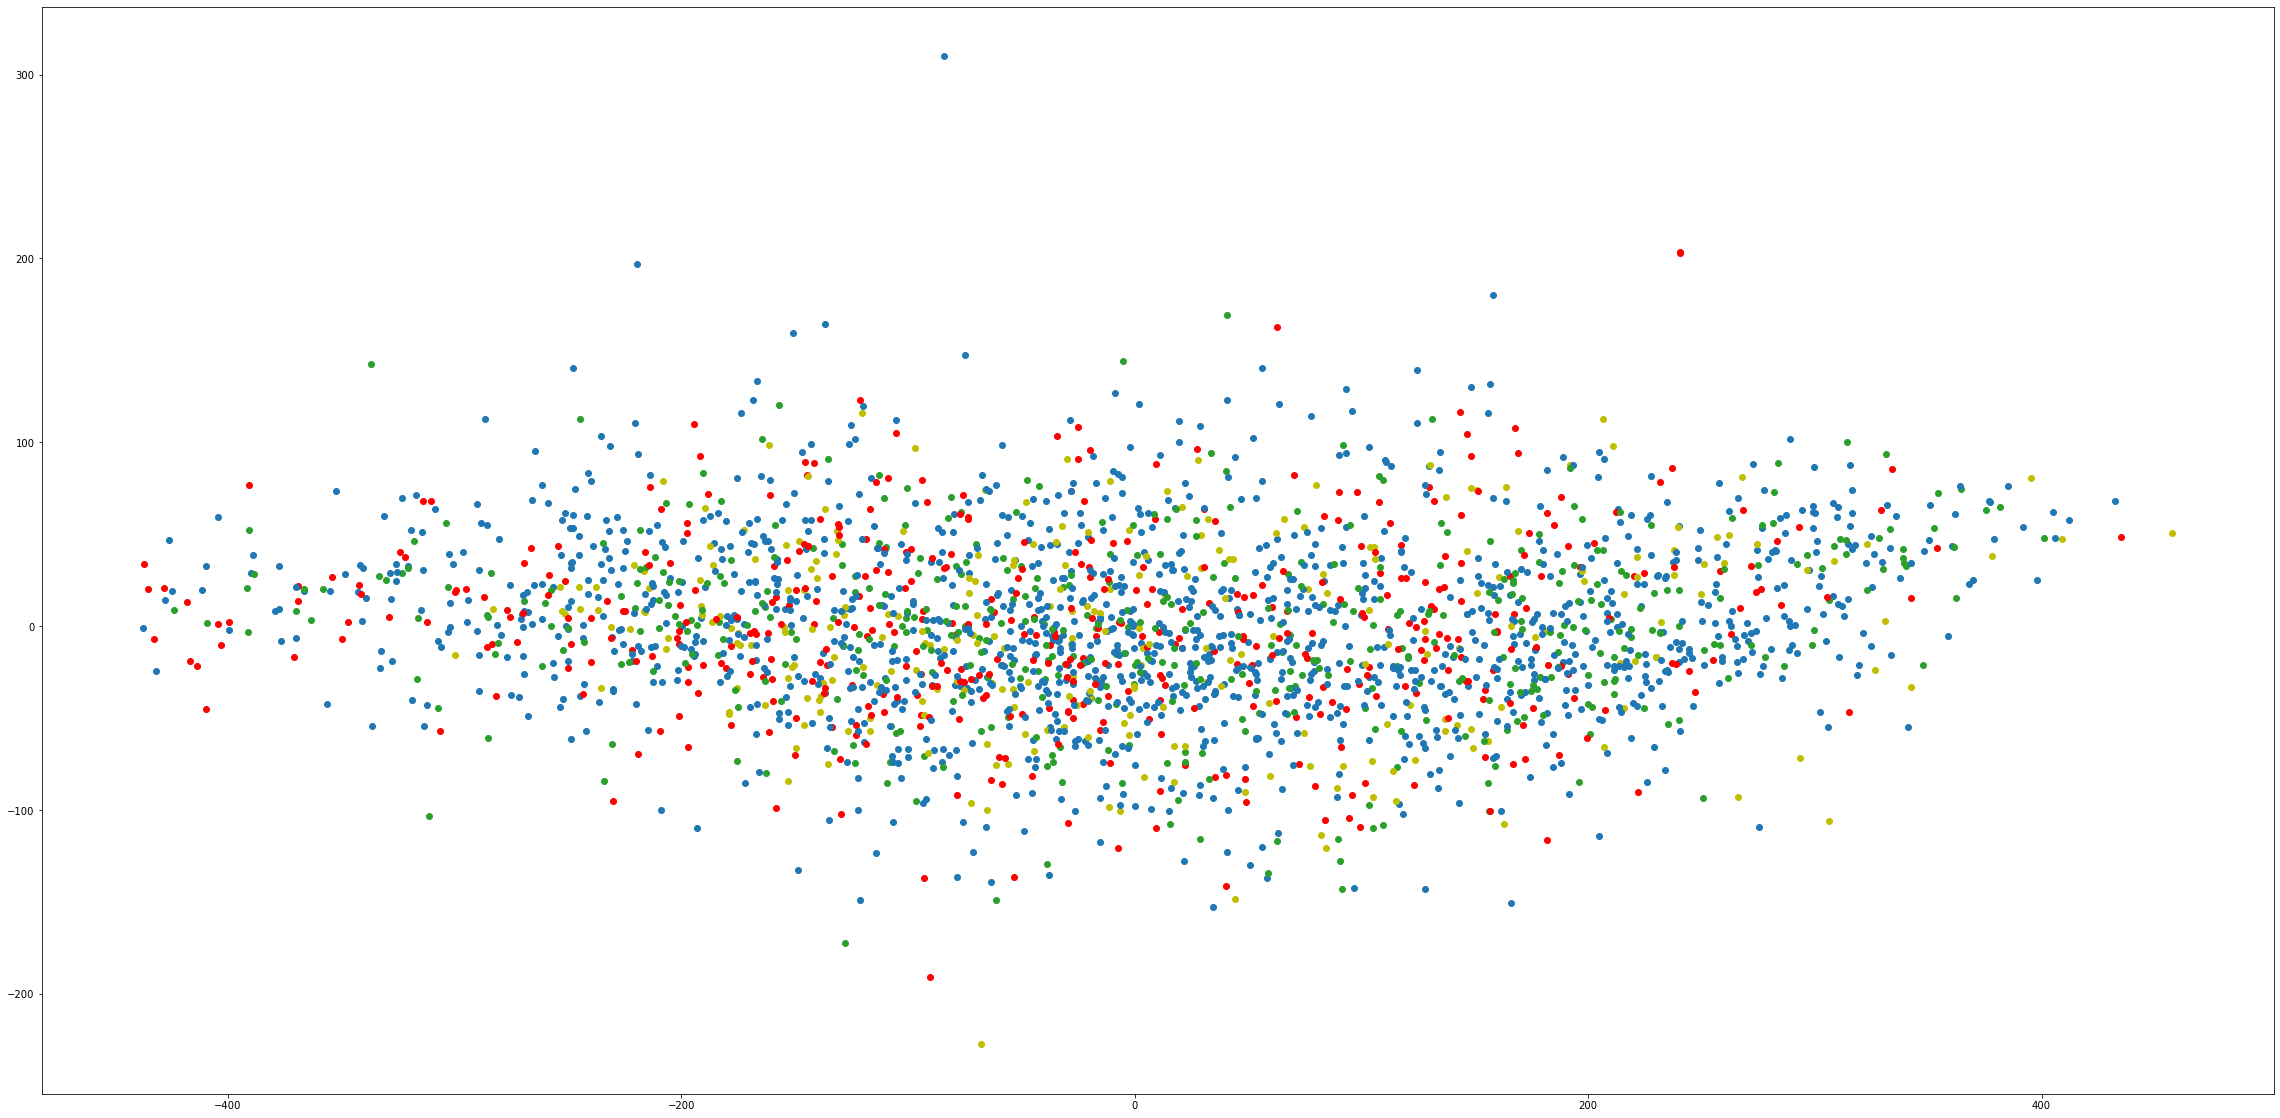

In [20]:
X_new = X_mel
pca=PCA(n_components=2)
proj=pca.fit_transform(X_new,y)
plot_projection(proj,y)

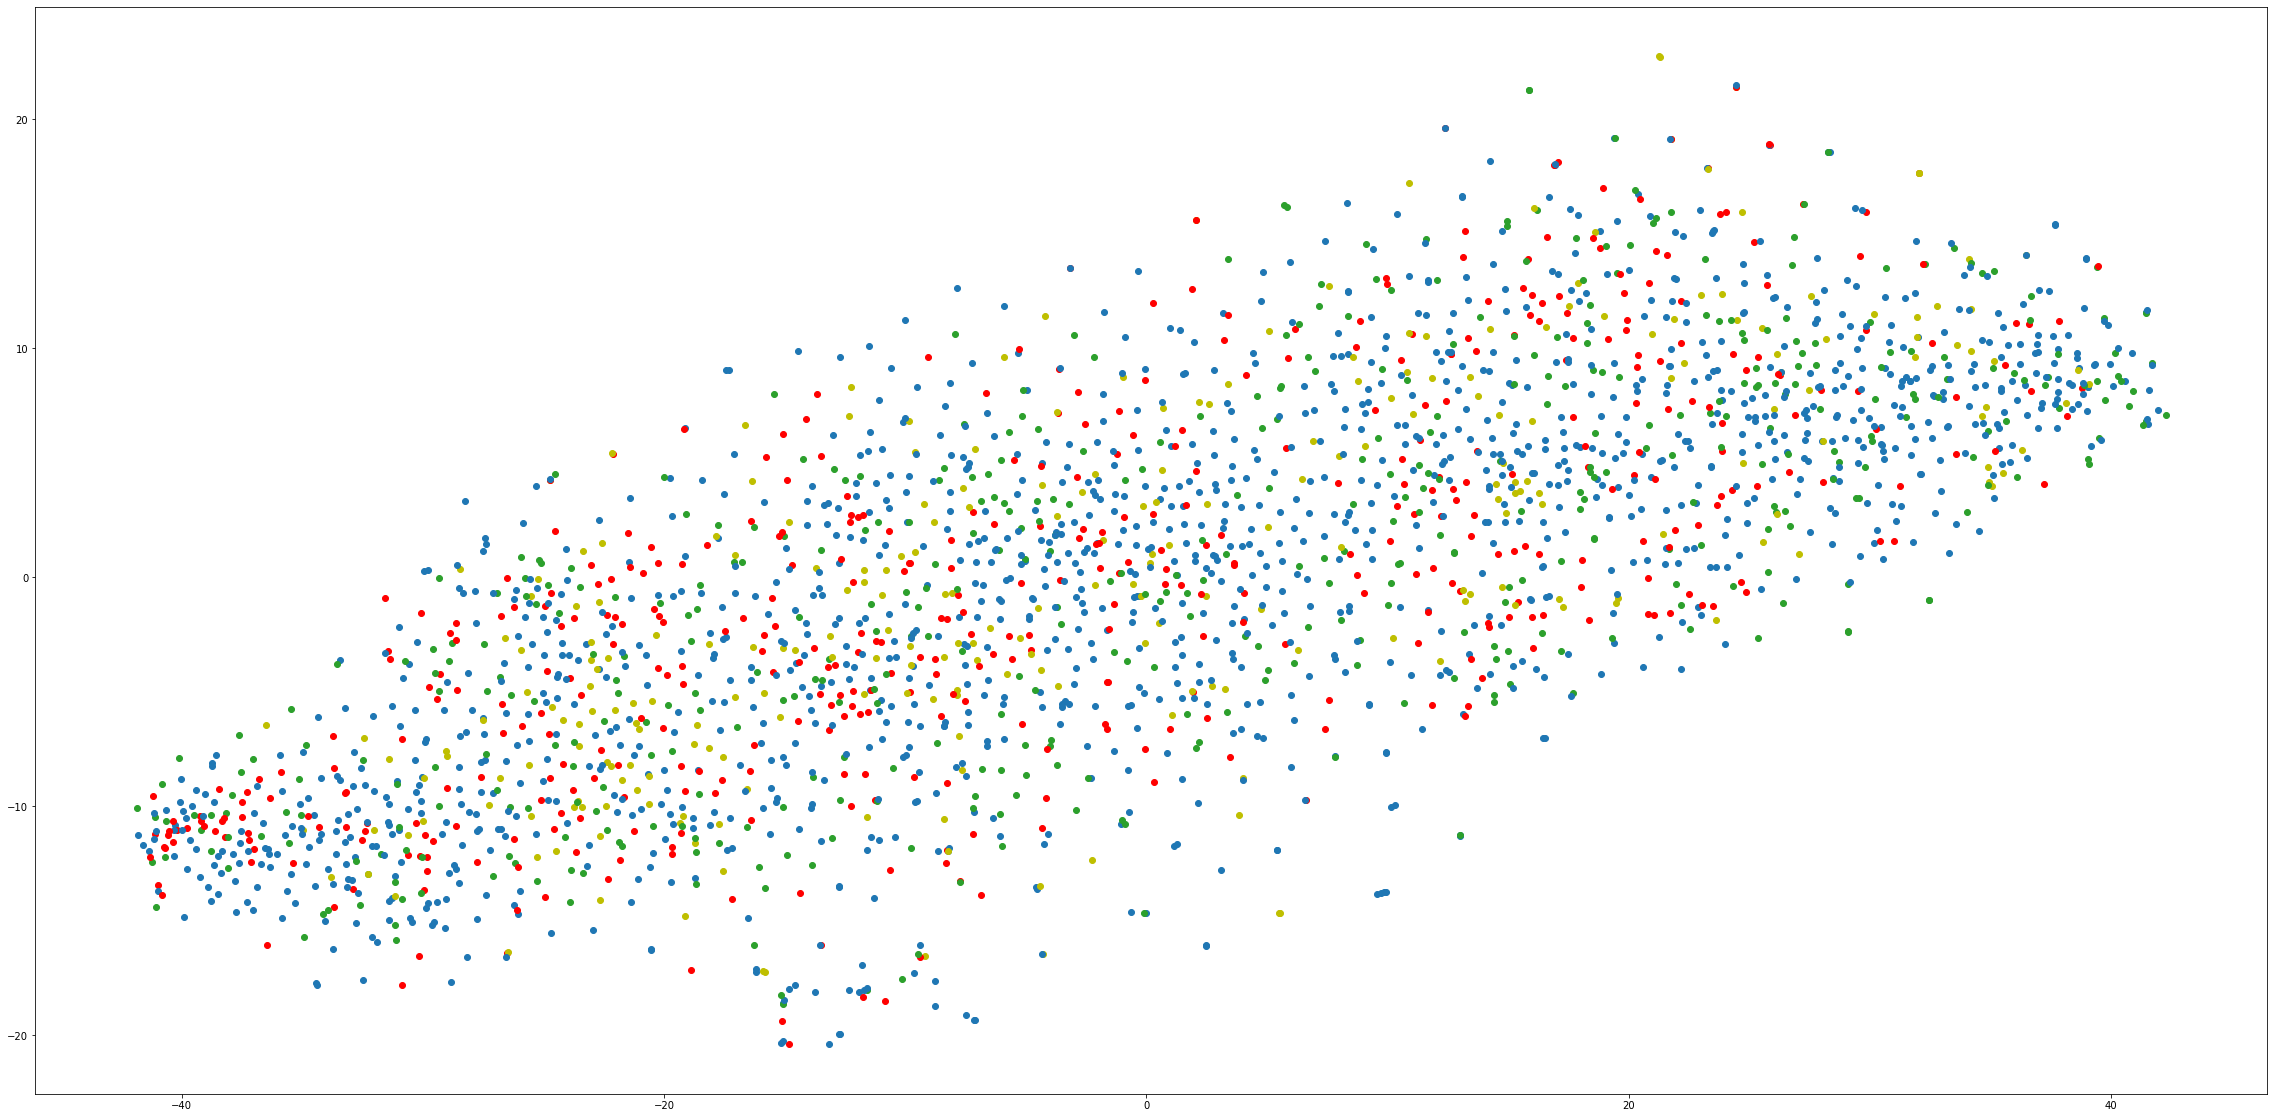

In [23]:
X_new = SelectKBest(mutual_info_classif, k=250).fit_transform(X_mel, y)#it was 1000
tsne=TSNE()
proj=tsne.fit_transform(X_new,y)
plot_projection(proj,y)